In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("refactored_foods.csv")
df = df.iloc[:841,:]
df

,image nr,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,State of food,Food vs nonfood,FPC,S,...,Average_Health_JP,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP
0,1,Oranges,Universal,2,Natural,Sweet,Raw,Food,0.2439,4.6617,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,2,Apples,Universal,3,Natural,Sweet,Raw,Food,0.3338,5.0094,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,3,Apple + parts,Universal,12,Natural,Sweet,Raw,Food,0.4168,4.9397,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,4,Appleparts,Universal,11,Natural,Sweet,Raw,Food,0.3115,4.7412,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,5,Grasshopper,Unappealing,50,Natural,Savory,NaN,Food,0.3107,4.9059,...,47.59,29.74,13.11,21.99,14.66,25.69,18.79,26.14,6.29,9.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,837,pepernoten (gingernuts) - large portion,Western,NaN,NaN,NaN,NaN,Food,0.5194,4.8716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,838,candied orange parts,Western,NaN,NaN,NaN,NaN,Food,0.2015,4.6495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,839,candied lemon parts,Western,NaN,NaN,NaN,NaN,Food,0.2236,4.6280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,840,candied orange and lemon parts,Western,NaN,NaN,NaN,NaN,Food,0.2320,4.6863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop('image nr', axis=1)

df = df[df['Food vs nonfood'] == "Food"]
df = df.drop('Food vs nonfood', axis=1)
df = df.drop('State of food', axis=1)
df = df[df['Food classification'] != 'Unappealing']
df = df[df['Food classification'] !=  'African']
#df = df.dropna(subset=['S'],how='all')
df.reset_index(drop=True,inplace=True)
#df = df.iloc[:,0:27]
df['Food classification'].value_counts()

Asian        301
Western      211
Universal    157
Name: Food classification, dtype: int64

In [4]:
def standardize_classification(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Universal":
        return 0
    elif item == "Western":
        return 1
    elif item == "Asian":
        return 2

def standardize_natural(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Natural":
        return 1
    else:
        return 0
    
def standardize_flavor(item):
    if (not isinstance(item, float)) and (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Savory":
        return 1
    else:
        return 0
    
def standardize_complexity(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif (item == "Complex") or (item == "complex"):
        return 10
    elif (int(item) >= 10):
        return 10
    else:
        return item

In [5]:
df['Food classification'] = df['Food classification'].apply(lambda x: standardize_classification(x))
df['Natural vs transformed'] = df['Natural vs transformed'].apply(lambda x: standardize_natural(x))
df['Sweet vs savory'] = df['Sweet vs savory'].apply(lambda x: standardize_flavor(x))
df['Complexity (amount, number of items)'] = df['Complexity (amount, number of items)'].apply(lambda x: standardize_complexity(x))
df

,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,FPC,S,P,C,E,...,Average_Health_JP,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP
0,Oranges,0,2,1.0,0,0.2439,4.6617,63.8553,0.0240,0.3480,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,Apples,0,3,1.0,0,0.3338,5.0094,65.4004,0.0410,0.3381,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,Apple + parts,0,10,1.0,0,0.4168,4.9397,66.8784,0.0567,0.3492,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,Appleparts,0,10,1.0,0,0.3115,4.7412,66.0402,0.0433,0.3878,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,Crostini,1,1,0.0,1,0.1735,4.5275,68.3825,0.0502,0.3765,...,33.31,22.19,28.19,26.71,33.91,33.47,21.20,19.05,29.92,25.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,pepernoten (gingernuts) - large portion,1,NaN,NaN,0,0.5194,4.8716,69.7927,0.0849,0.2669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,candied orange parts,1,NaN,NaN,0,0.2015,4.6495,68.2387,0.0442,0.3530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,candied lemon parts,1,NaN,NaN,0,0.2236,4.6280,67.1906,0.0418,0.3690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,candied orange and lemon parts,1,NaN,NaN,0,0.2320,4.6863,67.3786,0.0420,0.3535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
universalIdx = df.index[df['Food classification'] == 0].tolist()
westernIdx = df.index[df['Food classification'] == 1].tolist()
easternIdx = df.index[df['Food classification'] == 2].tolist()
westernIdx

[4,
 5,
 6,
 10,
 12,
 15,
 19,
 22,
 30,
 35,
 38,
 39,
 44,
 45,
 47,
 48,
 49,
 50,
 54,
 58,
 59,
 60,
 81,
 82,
 83,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 120,
 121,
 122,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 154,
 155,
 161,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 181,
 187,
 188,
 190,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 212,
 213,
 216,
 219,
 220,
 221,
 222,
 223,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 247,
 248,
 250,
 251,
 252,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 263,
 264,
 265,
 266,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 523,
 524,
 532,
 533,
 534,
 543,
 544,
 545,
 546,
 547,
 566,
 567,
 571,
 572,
 573,
 574,
 575,
 580,
 58

In [7]:
# For an explanation of LogisticRegression:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# https://medium.com/@kgpvijaybg/logistic-regression-on-iris-dataset-48b2ecdfb6d3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
temp = df.dropna()
temp = temp.drop('Description', axis=1)

In [9]:
model = LogisticRegression()

for i in range(0,5):

    X = temp.drop(columns=['Food classification'])
    Y = temp['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    print("Accuracy of LR Model: ", model.score(x_test, y_test))

Accuracy of LR Model:  0.7622377622377622
Accuracy of LR Model:  0.8181818181818182
Accuracy of LR Model:  0.7272727272727273
Accuracy of LR Model:  0.7762237762237763
Accuracy of LR Model:  0.8321678321678322


In [10]:
#df2[df2.isnull().any(axis=1)]

temp = df
temp = df[df['Average_Health_JP'].notna() & df['St._dev_Health_JP'].notna()]
temp

#nah = df[df.isnull().any(axis=1)]
#nah

imp = IterativeImputer(max_iter=1, n_nearest_features=10, sample_posterior=True, random_state=0)
imp.fit(temp.iloc[:,2:])
#test = df.iloc[478:, 5:]
idk = imp.transform(df.iloc[:,2:])
#idk

In [11]:
df2 = pd.DataFrame(idk)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,2.0,1.0,0.0,0.2439,4.6617,63.8553,0.0240,0.3480,0.9899,0.4698,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,3.0,1.0,0.0,0.3338,5.0094,65.4004,0.0410,0.3381,0.9823,0.4373,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,10.0,1.0,0.0,0.4168,4.9397,66.8784,0.0567,0.3492,0.9768,0.4919,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,10.0,1.0,0.0,0.3115,4.7412,66.0402,0.0433,0.3878,0.9828,0.4627,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,1.0,0.0,1.0,0.1735,4.5275,68.3825,0.0502,0.3765,0.9812,0.4089,...,33.31,22.19,28.19,26.71,33.91,33.47,21.20,19.05,29.92,25.55


In [12]:
#desc = df.Description
#df2.insert(0, 'Description', desc)

classif = df["Food classification"]
df2.insert(0, 'Food classification', classif)

df2.iloc[:,2] = df2.loc[:,2].apply(lambda x: round(abs(x)))

In [13]:
df2

,Food classification,0,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
0,0,2.000000,0,0.0,0.243900,4.661700,63.855300,0.024000,0.348000,0.989900,...,80.470000,12.070000,65.090000,26.500000,63.730000,27.000000,65.850000,29.620000,65.380000,22.610000
1,0,3.000000,0,0.0,0.333800,5.009400,65.400400,0.041000,0.338100,0.982300,...,74.320000,19.220000,63.080000,28.460000,61.320000,27.190000,69.230000,29.350000,59.060000,28.880000
2,0,10.000000,0,0.0,0.416800,4.939700,66.878400,0.056700,0.349200,0.976800,...,81.770000,17.190000,67.190000,25.450000,65.290000,23.370000,70.290000,25.220000,65.090000,27.610000
3,0,10.000000,0,0.0,0.311500,4.741200,66.040200,0.043300,0.387800,0.982800,...,79.140000,14.950000,63.190000,30.160000,60.310000,32.570000,66.580000,30.270000,63.220000,27.770000
4,1,1.000000,1,1.0,0.173500,4.527500,68.382500,0.050200,0.376500,0.981200,...,33.310000,22.190000,28.190000,26.710000,33.910000,33.470000,21.200000,19.050000,29.920000,25.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1,5.931922,0,0.0,0.519400,4.871600,69.792700,0.084900,0.266900,0.962000,...,61.982716,19.570540,39.971299,27.469641,29.898979,32.355843,40.210934,33.262915,44.909731,26.485551
665,1,3.661014,0,0.0,0.201500,4.649500,68.238700,0.044200,0.353000,0.981700,...,15.632007,19.828821,42.155773,27.592971,37.755678,29.182239,38.281268,24.644947,59.684441,22.957627
666,1,0.628043,0,0.0,0.223600,4.628000,67.190600,0.041800,0.369000,0.982200,...,33.650687,19.989084,43.010191,26.792529,39.802416,35.272761,59.699575,25.294658,37.726882,21.374354
667,1,7.518164,0,0.0,0.232000,4.686300,67.378600,0.042000,0.353500,0.982300,...,24.818069,16.795832,44.539540,29.185867,42.879300,28.805940,50.408921,21.122469,45.484142,32.332944


In [14]:
for i in range(0,5):

    X = df2.drop(columns=['Food classification'])
    Y = df2['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    
    print("Accuracy of LR Model: ", model.score(x_test, y_test))

Accuracy of LR Model:  0.6616915422885572
Accuracy of LR Model:  0.6616915422885572
Accuracy of LR Model:  0.6766169154228856
Accuracy of LR Model:  0.6915422885572139
Accuracy of LR Model:  0.6666666666666666


In [15]:
y_pred = model.predict(x_test)

probs_y = model.predict_proba(x_test)
probs_y = np.round(probs_y, 2)

pred_perc = pd.DataFrame(probs_y)
pred_perc.columns = ['Universal%', 'Western%', 'Asian%']

display(pred_perc)
display(pd.DataFrame(y_test))

,Universal%,Western%,Asian%
0,0.01,0.04,0.95
1,0.21,0.60,0.18
2,0.04,0.48,0.48
3,0.93,0.04,0.03
4,0.08,0.72,0.20
...,...,...,...
196,0.49,0.27,0.25
197,0.32,0.14,0.54
198,0.04,0.48,0.48
199,0.05,0.75,0.20


,Food classification
446,2
624,0
212,1
53,0
135,1
...,...
637,2
643,0
131,1
111,1


In [16]:
X = df2.transpose()
pca = PCA(n_components=2)
pca.fit(X)
pca.components_
pcaDf = pd.DataFrame(pca.components_).transpose()
pcaDf

,0,1
0,0.034007,0.060565
1,0.067686,-0.012731
2,0.063357,0.000550
3,0.054978,0.013735
4,0.038578,-0.011140
...,...,...
664,0.022975,0.042989
665,0.036503,0.008646
666,0.035562,0.015954
667,0.051682,-0.013538


In [18]:
universalCords = pcaDf.iloc[universalIdx]
westernCords = pcaDf.iloc[westernIdx]
easternCords = pcaDf.iloc[easternIdx]

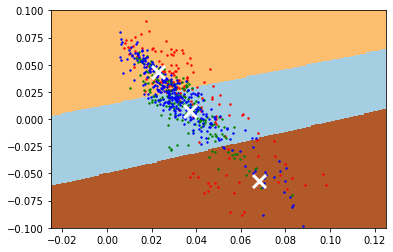

In [29]:
# Code Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

kmeans = KMeans(n_clusters=3, random_state=0).fit(pcaDf)

# plt.plot(pcaDf.iloc[:, 0], pcaDf.iloc[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_

h = 0.001

x_min, x_max = pcaDf.iloc[:, 0].min() - 1, pcaDf.iloc[:, 0].max() + 1
y_min, y_max = pcaDf.iloc[:, 1].min() - 1, pcaDf.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

plt.scatter(universalCords.iloc[:,0] , universalCords.iloc[:,1] , color = 'red', s=2)
plt.scatter(westernCords.iloc[:,0] , westernCords.iloc[:,1] , color = 'green', s=2)
plt.scatter(easternCords.iloc[:,0] , easternCords.iloc[:,1] , color = 'blue', s=2)

plt.xlim(-.025, 0.125) #-.05,.15
plt.ylim(-.1, 0.1)
plt.xticks(visible = True)
plt.xticks(visible = True)
plt.show()